# **Lecure 3 excercises**

## ***Part I: below is another direct way for polynominal regression***
>
>- Your task is to use the Sklearn to repeat the polynominal regression 
>- Secondly, you should try to use Spline regression to fit the model and compare them
>- Write a short report to demonstrate your results
>

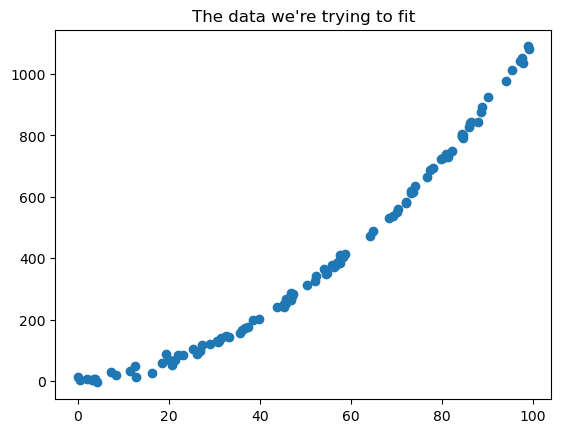

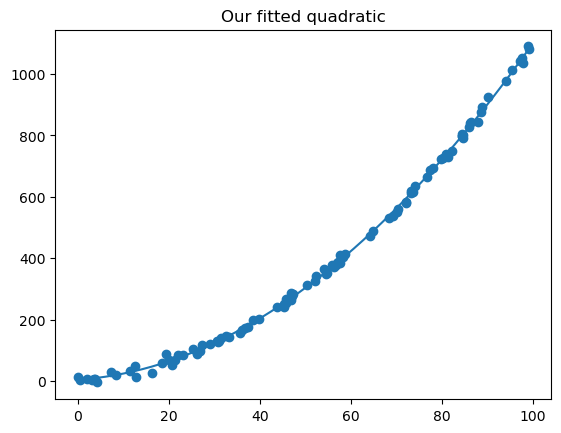

the r-squared is: 0.9991412296366858


In [1]:
import numpy as np
import matplotlib.pyplot as plt


# load the data
X = []
Y = []
for line in open('data_poly.csv'):
    x, y = line.split(',')
    x = float(x)
    X.append([1, x, x*x]) # add the bias term x0 = 1
    # our model is therefore y_hat = w0 + w1 * x + w2 * x**2
    Y.append(float(y))

# let's turn X and Y into numpy arrays since that will be useful later
X = np.array(X)
Y = np.array(Y)

# let's plot the data to see what it looks like
plt.scatter(X[:,1], Y)
plt.title("The data we're trying to fit")
plt.show()


# apply the equations we learned to calculate a and b
# numpy has a special method for solving Ax = b
# so we don't use x = inv(A)*b
# note: the * operator does element-by-element multiplication in numpy
#       np.dot() does what we expect for matrix multiplication
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))


# let's plot everything together to make sure it worked
plt.scatter(X[:,1], Y)

# to plot our quadratic model predictions, let's
# create a line of x's and calculate the predicted y's
x_line = np.linspace(X[:,1].min(), X[:,1].max())
y_line = w[0] + w[1] * x_line + w[2] * x_line * x_line
plt.plot(x_line, y_line)
plt.title("Our fitted quadratic")
plt.show()


# determine how good the model is by computing the r-squared
Yhat = X.dot(w)
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("the r-squared is:", r2)
